In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from textblob import TextBlob

In [3]:
data=pd.read_csv('/home/anilla/DataScience/gender-classifier-DFE-791531.csv',encoding='latin-1')

In [5]:
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [6]:
data.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


In [8]:
data.describe(include='O')

,_unit_state,_last_judgment_at,gender,profile_yn,created,description,gender_gold,link_color,name,profile_yn_gold,profileimage,sidebar_color,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,20050,20000,19953,20050,20050,16306,50,20050,20050,50,20050,20050,20050,159,20050,12566,12252
unique,2,283,4,2,18699,15140,6,3001,18795,1,17164,561,18412,146,5,7864,156
top,finalized,10/26/15 23:05,female,yes,8/24/15 14:19,"You can be spiritually empowered, financially ...",male,0084B4,TudoSobreQuase,yes,https://abs.twimg.com/sticky/default_profile_i...,C0DEED,EVERYDAYILOVEYOU Forevermore\n\nand what makes...,"[27.8428, -82.6995]",10/26/15 12:40,London,Eastern Time (US & Canada)
freq,20000,217,6700,19953,30,33,19,9890,30,50,248,9093,193,2,8076,152,2496


In [9]:
data

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
5,815719231,False,finalized,3,10/27/15 1:47,female,1.0000,yes,1.0,3/11/10 18:14,...,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/15 12:40,6.587300e+17,New York Gritty,Central Time (US & Canada)
6,815719232,False,finalized,3,10/27/15 1:57,brand,1.0000,yes,1.0,4/24/08 13:03,...,https://pbs.twimg.com/profile_images/528547133...,0,0,@BpackEngineer Thank you for your patience whi...,NaN,13354,10/26/15 12:40,6.587300e+17,Worldwide,Eastern Time (US & Canada)
7,815719233,False,finalized,3,10/26/15 23:48,male,1.0000,yes,1.0,12/3/12 21:54,...,https://pbs.twimg.com/profile_images/508875440...,0,C0DEED,Gala Bingo clubs bought for å£241m: The UK's l...,NaN,112117,10/26/15 12:40,6.587300e+17,NaN,NaN
8,815719234,False,finalized,3,10/27/15 1:52,female,1.0000,yes,1.0,9/8/15 4:50,...,https://pbs.twimg.com/profile_images/658670112...,0,0,@_Aphmau_ the pic defines all mcd fangirls/fan...,NaN,482,10/26/15 12:40,6.587300e+17,NaN,NaN
9,815719235,False,finalized,3,10/27/15 1:49,female,1.0000,yes,1.0,5/13/11 3:32,...,https://pbs.twimg.com/profile_images/513327289...,0,FFFFFF,@Evielady just how lovely is the tree this yea...,NaN,26085,10/26/15 12:40,6.587300e+17,"Nottingham, England.",Amsterdam


In [10]:
data.columns.tolist()

['_unit_id',
 '_golden',
 '_unit_state',
 '_trusted_judgments',
 '_last_judgment_at',
 'gender',
 'gender:confidence',
 'profile_yn',
 'profile_yn:confidence',
 'created',
 'description',
 'fav_number',
 'gender_gold',
 'link_color',
 'name',
 'profile_yn_gold',
 'profileimage',
 'retweet_count',
 'sidebar_color',
 'text',
 'tweet_coord',
 'tweet_count',
 'tweet_created',
 'tweet_id',
 'tweet_location',
 'user_timezone']

In [11]:
data.dtypes

_unit_id                   int64
_golden                     bool
_unit_state               object
_trusted_judgments         int64
_last_judgment_at         object
gender                    object
gender:confidence        float64
profile_yn                object
profile_yn:confidence    float64
created                   object
description               object
fav_number                 int64
gender_gold               object
link_color                object
name                      object
profile_yn_gold           object
profileimage              object
retweet_count              int64
sidebar_color             object
text                      object
tweet_coord               object
tweet_count                int64
tweet_created             object
tweet_id                 float64
tweet_location            object
user_timezone             object
dtype: object

In [12]:
data[['text','tweet_location']]

,text,tweet_location
0,Robbie E Responds To Critics After Win Against...,main; @Kan1shk3
1,ÛÏIt felt like they were my friends and I was...,NaN
2,i absolutely adore when louis starts the songs...,clcncl
3,Hi @JordanSpieth - Looking at the url - do you...,"Palo Alto, CA"
4,Watching Neighbours on Sky+ catching up with t...,NaN
5,"Ive seen people on the train with lamps, chair...",New York Gritty
6,@BpackEngineer Thank you for your patience whi...,Worldwide
7,Gala Bingo clubs bought for å£241m: The UK's l...,NaN
8,@_Aphmau_ the pic defines all mcd fangirls/fan...,NaN
9,@Evielady just how lovely is the tree this yea...,"Nottingham, England."


In [13]:
data['tweet_location'].isnull().count()

20050

In [14]:
len(data)# total values

20050

In [15]:
location_data=data['tweet_location'].count() #non empty values

In [16]:
no_location_data=len(data) - data['tweet_location'].count()


In [17]:
location_data

12566

In [18]:
no_location_data


7484

## Natural Language Processing

In [18]:
#dividing the data for training and testing


In [19]:
np.random.seed(12345)
msk=np.random.rand(len(data))<0.8
train=data[msk]
test=data[~msk]

In [182]:
len(train)

15959

In [21]:
len(test)

4091

In [22]:
train.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
5,815719231,False,finalized,3,10/27/15 1:47,female,1.0000,yes,1.0,3/11/10 18:14,...,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/15 12:40,6.587300e+17,New York Gritty,Central Time (US & Canada)


1. Tokenization

In [23]:
train['location']=test['tweet_location'].isnull()

/home/anilla/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
a=train['tweet_location'].isnull().value_counts()

In [25]:
a

False    10019
True      5940
Name: tweet_location, dtype: int64

False    10019
True      5940
Name: tweet_location, dtype: int64

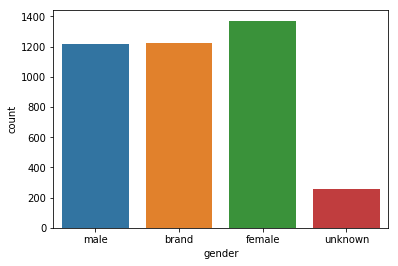

In [26]:
sns.countplot(x='gender',data=test)
train['tweet_location'].isnull().value_counts()

In [32]:
b=train['text']

In [43]:
type(train)

pandas.core.frame.DataFrame

In [34]:
b[1]

'\x89ÛÏIt felt like they were my friends and I was living the story with them\x89Û\x9d https://t.co/arngE0YHNO #retired #IAN1 https://t.co/CIzCANPQFz'

In [37]:
blob = TextBlob(b[3])
print(blob.sentiment.polarity)

0.16666666666666669


In [41]:
for x in b:
    blob=TextBlob(x)
    print(blob.sentiment.polarity)

0.0
0.20277777777777775
0.16666666666666669
0.9375
0.0
0.16
0.0
0.6625
0.0
0.0
0.0
0.4
0.0
-0.2513888888888889
0.0
0.0
0.2857142857142857
0.06507936507936506
0.0
0.0
0.25
0.15
0.0
0.0
0.5
0.16
-0.125
0.0
0.0
-0.08806818181818182
0.075
0.0
0.0
0.0
-0.5
0.7
-0.3333333333333333
0.8
0.16
0.0
0.13636363636363635
0.0
0.020833333333333332
0.1
0.16
0.37878787878787873
-0.6999999999999998
0.0
0.45
0.5
1.0
0.4
0.26666666666666666
0.6
0.28
-0.14999999999999997
-0.425
0.375
0.1333333333333334
0.13636363636363635
0.5
0.0
0.2
0.5625
0.0
0.0
0.0
-0.29000000000000004
0.0
0.0
0.15000000000000002
0.075
0.0
0.0
0.0
0.0
0.8
-0.07777777777777779
0.0
0.39999999999999997
0.0
-0.16666666666666666
-0.3
0.1
0.0
0.61
-0.1
-0.125
0.0
0.5
-0.07500000000000001
-0.09375
0.8
0.0
0.0
0.0
0.0
-0.07142857142857142
0.13636363636363635
0.0
0.0
0.55
0.2
0.0
0.0
0.0
-0.4
0.13636363636363635
0.16
0.5
0.0
0.3090909090909091
0.0
-0.2
0.0
0.0
0.0
0.25
0.0
0.3375
0.0
0.0
0.43333333333333335
-0.2
0.0
0.16
0.0
0.0
-0.1875
-0.35000

0.0
0.0
-0.1
-0.11666666666666668
-0.023809523809523808
0.0
1.0
0.15666666666666668
-0.8571428571428572
-0.21666666666666667
0.25
0.4
0.625
0.0
0.0
0.0
0.5
0.1875
0.0
0.55
0.0
0.0
0.0
0.0
0.465
0.5
-0.5
1.0
0.22499999999999998
0.5
0.0
0.1
0.0
0.1
0.8
1.0
0.35000000000000003
0.5125
0.018181818181818174
-0.5
-0.37777777777777777
-0.049999999999999996
0.35
-0.125
-0.4
0.0
0.35189393939393937
0.0
0.0
-0.25
0.10000000000000002
0.0
0.0
0.0
-0.1
0.04999999999999999
0.5
0.375
0.0
0.0
-0.1
0.5
0.3
-0.390625
0.13636363636363635
0.2
0.05
0.5
0.0
0.0
0.0
-0.5833333333333334
0.0
0.0
0.25
0.05
0.09999999999999999
0.0
0.0
-0.2
0.16666666666666666
0.0
0.0
0.0
-0.024999999999999994
0.41818181818181815
0.0
-0.2
0.022222222222222213
0.125
0.08
0.0
0.21666666666666665
0.0
0.0
0.0
0.0
-0.4
-0.19166666666666665
0.0
-0.125
0.0
0.2571428571428571
0.0
0.5
0.0
0.0
0.0
-0.4
1.0
0.0
-0.052727272727272734
0.4
0.0
0.0
0.0
0.1
0.5681818181818181
0.3125
-0.6
-0.55
-0.1
-0.327020202020202
-0.4
0.174375
0.0
-0.20416666

0.3
0.0
0.0
0.21818181818181817
0.06818181818181818
0.2555555555555556
-0.45000000000000007
0.0
1.0
0.0
0.0
0.08333333333333333
0.25
0.0
0.07101010101010101
-1.0
0.0
0.13636363636363635
-0.4
0.1
0.5
0.14999999999999997
0.0
0.1
-0.5
1.0
0.0
0.0
0.0
0.0
0.2
0.3333333333333333
-0.6
0.425
0.0
1.0
0.5
0.029166666666666646
0.8
-0.125
0.3333333333333333
0.0
0.3852272727272727
0.0
-0.8
0.09999999999999999
0.14545454545454545
0.0
-0.2
-0.13333333333333333
0.325
0.2416666666666667
0.0
0.0
-0.05681818181818182
0.4
0.0
0.0
0.0
0.1333333333333333
0.0
-0.25
0.195
-0.3
0.0
0.35
-0.5
0.0
0.45
-0.8
0.0
0.25
-0.024999999999999994
-0.5
1.0
0.3181818181818182
0.6000000000000001
0.5
0.5
0.005681818181818177
0.05000000000000002
0.0
0.4375
0.19999999999999998
0.0
0.8
0.0
0.475
0.0
-0.3125
0.0
0.0
-1.0
0.5
0.41071428571428575
0.0
-0.45
0.0
0.1
0.13636363636363635
0.8
0.78
-0.4
0.0
0.390625
0.0
0.0
0.16666666666666666
1.0
0.0
1.0
0.0
-0.09999999999999998
-0.13333333333333333
0.6428571428571428
0.0
0.3
0.0
0.55

0.0
0.0
0.0
0.6
0.0
0.125
0.1375
0.0
0.0
0.0
0.225
0.0
0.54
-0.11666666666666665
0.0
0.625
0.0
0.25
-0.4
0.0
0.5
0.06818181818181818
0.0
0.0
0.0
0.0
0.0
0.1
0.4
-0.0625
0.0
0.0
0.0
0.0
0.0
0.041666666666666664
-0.07142857142857142
0.0
0.0
0.0
0.25
0.0
1.0
0.0
0.2
0.6
0.625
0.0
0.0
0.0
0.0
-0.375
0.0
-0.4
0.3181818181818182
0.0
-0.05555555555555555
0.0
0.3125
0.16666666666666666
0.3666666666666667
0.0
0.0
0.0
0.0
0.5
0.5
0.0
0.0
0.475
1.0
0.0
0.26666666666666666
-0.2
-1.0
0.5681818181818181
0.0
0.25
0.35
0.5166666666666667
-0.2
0.75
0.4
0.6
0.0
-0.6
0.0
0.0
-0.25
-0.08181818181818182
0.0
0.0
-0.09375
0.16666666666666663
-0.2916666666666667
0.0
0.23989898989898992
1.0
-0.3
-0.10833333333333334
0.0
0.0
0.5
0.55
0.3480902777777778
0.0
-0.3499999999999999
0.0
0.0
0.6428571428571428
0.0
0.35
0.0
0.0
0.0
-1.0
0.2222222222222222
0.0
0.2857142857142857
0.18409090909090908
0.2
0.35
0.0
0.0
0.0
0.0
0.0
0.4
-0.1875
-0.05
0.2375
0.0
0.0
0.26633522727272724
-0.4
0.8
0.0
-0.3333333333333333
0.0
0.1
0

0.0
0.25
0.0
0.0
0.25
0.8
0.1
0.0
0.1
0.0
0.0
0.0
0.0
0.0
0.0
-0.2878787878787879
-0.125
0.0
0.7666666666666666
0.0
0.06818181818181818
0.21000000000000002
0.0
0.35
0.25
-0.11666666666666665
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
-0.3
0.0
-0.31851851851851853
0.0
0.3
0.0
0.25
0.0
0.29166666666666663
0.0
0.13636363636363635
0.10000000000000002
0.1
-0.17500000000000002
-0.07777777777777777
0.0
0.0
0.0
0.3
0.575
0.8
0.0
0.1
-0.06666666666666661
-0.25
0.4166666666666667
0.0
0.6059659090909091
0.0
0.1
0.95
-0.3
0.0
0.0
0.0
-0.1
0.0
0.7
0.7749999999999999
0.0
0.225
0.6000000000000001
0.2
0.0
0.0
0.0
0.4
0.5
0.0
0.0
0.1464285714285714
0.054166666666666655
0.25
0.3166666666666667
0.03214285714285714
0.0
0.0
-0.09999999999999994
0.0
-0.4
0.0
-0.2
0.10714285714285714
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1514520202020202
-0.5
0.4
0.0
0.0
0.0
0.0
0.0
-0.5
0.0
0.0
0.0
0.04642857142857142
0.0
1.0
-0.03333333333333333
0.0
-0.4
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
-0.1013888888888889
-0.6
0.0
0.0
0.26785

0.1
-0.1
-0.25
0.0
0.25
-0.125
0.5
0.0
0.7232142857142857
0.0
-0.31851851851851853
0.0
0.0
0.2
0.25
0.0
0.2
0.0
1.0
0.0
0.0
0.0
0.0
0.16666666666666666
0.0
-0.2916666666666667
0.0
0.35
0.0
0.0
0.0
0.00416666666666667
-0.02916666666666662
0.0
0.0
0.8
0.0
0.15000000000000002
0.5
0.85
0.0
-0.5
0.0
0.0
0.0
0.4982142857142857
0.13636363636363635
0.6458333333333334
0.0
0.2
0.0
0.2
0.0
0.0
0.0
0.25
0.0
0.0
0.0
-0.4
0.0
0.0
0.0
0.35
0.2
-0.4
0.26150793650793647
0.2875
0.0
0.0
0.0
-0.5
0.0
0.0
0.0
0.1375
0.0
0.6
-0.03333333333333333
0.55
0.0
0.3
0.0
0.0
-0.041666666666666664
0.5
0.3416666666666666
0.05
0.0
0.0
0.30952380952380953
0.0
0.0
0.4
0.0
0.0
0.0
0.0
-0.3
0.0
0.0
0.0
0.0
0.0
0.0
0.16666666666666666
-0.5
-0.15000000000000002
0.0
0.0
0.174375
-0.0375
0.5666666666666667
0.54
-0.3
0.0
0.0
-0.4
0.0
0.0
0.4
0.0
0.25
-0.3
-0.3
0.0
0.4
0.5
0.44285714285714284
0.0
0.0
0.14545454545454548
0.0
0.0
1.0
0.0
0.0
0.0
0.475
0.5
0.0
0.0
-0.05
-0.2
0.3
0.0
0.0
0.4
0.1607142857142857
0.0
0.0
0.093181818181

0.08333333333333333
0.0
0.0
0.0
0.0
0.1
-0.6
-0.19444444444444448
0.3333333333333333
0.0
0.0
-0.15555555555555559
0.0
-0.25
-0.2
0.0
0.0
0.0
0.5
0.0
0.30000000000000004
0.3416666666666666
0.0
0.0
0.0
0.0
0.8
0.35189393939393937
0.13333333333333333
0.0
-0.375
0.0
0.00416666666666667
0.25
0.0
0.0
0.2
-0.23055555555555554
0.9
0.125
0.0
0.2
0.0
0.0
0.625
0.0
0.0
0.16041666666666668
0.35
0.0
0.0
0.0
0.016666666666666663
0.0
-0.1
0.0
0.11785714285714285
0.2390625
0.06818181818181818
-0.4
-0.1125
0.0
0.0
0.0
-0.17708333333333331
0.5583333333333333
0.0
0.0
0.1
0.0
0.0
0.0
0.0
0.61
0.0
0.0
0.5
-0.0625
0.4375
0.625
0.0
0.0
0.2625
0.0
0.0
0.55
0.3111111111111111
0.0
0.0
0.0
0.0
0.0
0.3125
-0.15000000000000002
0.0
0.0
0.0
0.0
0.375
-0.8
0.0
-0.16666666666666666
-0.8
0.0
0.17857142857142858
0.15000000000000002
0.5
-0.5
0.0
0.0
0.175
0.5678571428571428
-0.2
0.0
0.0
0.0
0.0
0.0
0.16666666666666666
0.34545454545454546
0.7
0.0
0.0
0.5
0.0
0.0
-0.05
0.0
0.0
0.0
0.0
1.0
0.5479166666666667
0.0
-0.15555555

0.04999999999999999
-0.4
-0.16666666666666666
0.38
-0.7
0.0
0.39999999999999997
0.0
0.25
0.31
0.0
-0.525
0.4288818359375
0.5
0.1
0.0
0.5
0.15000000000000002
-0.3
0.2
0.1
-0.8
-0.1
0.15340909090909088
0.0
0.0
-0.013333333333333336
0.13636363636363635
0.0
0.0
0.02272727272727272
0.0
-0.15000000000000002
-0.07777777777777779
0.2
0.14999999999999997
-1.0
0.5
0.4
0.375
0.0
0.0
0.0
0.0
0.0
0.45999999999999996
0.35
0.03333333333333333
0.23333333333333334
0.0
0.06875
0.25
1.0
0.85
0.0
-0.3
-0.21875
0.4
-0.3333333333333333
0.13636363636363635
0.3666666666666667
0.7
-0.25681818181818183
0.6
0.2
-0.3
0.0
0.13636363636363635
0.0
-0.4000000000000001
0.5
0.0
0.0
0.0
0.0
0.44999999999999996
-0.625
-0.35625
0.0
0.0
0.0
-0.15625
0.0
0.5
0.4000000000000001
0.58125
0.0
0.0
0.0
0.4333333333333333
0.5
0.0
0.06666666666666667
0.3
0.25
0.0
0.0
0.0
0.0
0.4333333333333333
-0.02715657552083331
-0.5
0.35
0.0
-0.09999999999999999
0.0
0.4333333333333333
0.1
0.0
0.0
0.0
0.0
0.0
0.22727272727272727
0.416666666666666

0.0
0.0
-0.75
0.0
0.1
-0.125
0.0
0.09523809523809523
0.0
0.125
0.5
0.1
0.0
0.20416666666666664
-0.8
0.25
0.6333333333333333
0.0125
0.0
0.15
0.35
-0.25
0.625
0.0
0.0
-0.22166666666666668
0.24285714285714285
0.3541666666666667
0.23333333333333336
-0.3
-0.10000000000000002
-0.15000000000000002
0.0
0.65
0.0
0.0
0.125
0.65
0.0
0.0
0.0
0.0
0.11481481481481481
0.0
0.35
0.22499999999999998
0.0
0.26666666666666666
0.2
-0.625
0.0
0.25
0.0
-0.32499999999999996
0.0
0.35
0.0
0.0
0.0
0.5
-0.05
0.5
0.0
0.0
0.04444444444444445
0.06666666666666667
0.0
0.21666666666666667
-0.05
0.0
-0.1
0.27777777777777785
-0.1
0.0
0.5
0.0
0.0
0.4107142857142857
-0.25
0.4
0.0625
0.0
0.0
0.0
0.0
-0.8749999999999998
0.06666666666666667
0.0
0.075
-0.15000000000000002
0.5
0.6333333333333333
0.07784090909090907
0.0
0.5
0.0
0.0
0.5
0.0
0.0
-0.5
-0.2
0.45
0.0
-0.4
0.35
0.6
0.5
0.0
0.0
0.4666666666666666
0.0
0.05000000000000001
0.0
0.0
0.0
-0.4
0.0
0.3875
0.0
1.0
-0.06590909090909092
0.4
-0.3
0.2
0.0
0.1278409090909091
-0.125
0

-0.4
-0.125
0.0
0.8
0.8
0.0
0.0
0.8
0.050925925925925895
0.0
-0.08333333333333333
0.0
-0.4
0.40625
0.0
-0.625
0.65
0.375
0.2872727272727273
0.4
0.25
0.15
1.0
1.0
0.0
0.1111111111111111
0.26666666666666666
0.0
0.3181818181818182
0.0
0.19242424242424244
-0.45
0.0
0.0
-0.5
0.340625
-0.26
0.0
0.7666666666666666
0.7333333333333334
-0.6333333333333333
0.0
-1.0
0.75
0.2
0.24345238095238095
0.1
0.0
0.375
0.0
0.016666666666666635
-0.1
-0.3
-0.2
-0.625
0.1
0.24318181818181817
-0.0625
0.7
0.011111111111111118
0.14301948051948052
0.0
-0.3
0.25
0.2833333333333333
0.625
-0.05043290043290043
0.0
0.5
0.0
0.0
0.13636363636363635
1.0
0.0
-0.125
0.10590277777777778
0.39285714285714285
0.15340909090909088
0.4333333333333334
0.4166666666666667
0.75
-0.0625
0.03333333333333333
-0.5
0.375
0.5
0.5
0.0
0.0
0.5
-0.75
0.0
0.0
0.0
0.0
-0.20833333333333331
0.0
0.0
-0.625
0.0
0.0
0.0
0.35
0.0
0.42857142857142855
0.5
0.88828125
0.2
0.075
0.55
0.0
0.0
0.25
0.5888888888888889
0.375
0.0
-0.46666666666666673
-0.00833333

0.20000000000000004
0.06944444444444443
-0.2833333333333333
-0.46875
-0.2
0.65
0.0
0.0
0.0
0.15555555555555559
0.0
0.0
0.0
0.0
0.0
0.23
0.0
0.0
0.0
-0.625
0.0
-0.3
-0.3
0.033333333333333326
-0.08333333333333334
0.0
-0.625
0.0
0.275
0.0
0.7333333333333334
0.1875
0.2
-0.07142857142857142
0.0
0.0
0.0
0.0
0.1
0.0
0.0
0.0
-0.024999999999999994
0.8
0.2
0.8
-0.5
0.15
0.25
0.5
0.625
1.0
0.0
0.9
0.3
0.0
0.25
0.0
0.19285714285714284
-0.08787878787878789
0.0
0.8
0.25
-0.15
-0.06388888888888888
0.0
0.35
0.07500000000000001
0.1
0.7000000000000001
0.37500000000000006
-0.014772727272727285
0.48928571428571427
0.0
0.0
0.10714285714285714
0.8
-0.06818181818181818
0.3111111111111111
-0.07777777777777779
-0.03333333333333333
0.18333333333333335
-0.3125
0.22619047619047616
0.0
0.0
0.0
-0.5249999999999999
-0.1
0.675
-0.125
0.75
1.0
-0.02499999999999991
-0.0625
0.0
0.0
-0.1
0.16818181818181818
0.0
0.4
-0.2884615384615385
0.0
0.0
0.0
0.0
0.0
0.16249999999999998
0.0
0.7
0.0
0.0
0.0
0.0
-0.4
-0.083333333333333

-0.125
0.019999999999999997
-0.4
-0.2
0.1875
0.16666666666666669
0.15833333333333333
0.7
0.525
0.4
0.0
0.5
0.0
-0.15000000000000002
0.43333333333333335
0.0
0.0
0.0
0.25
0.7000000000000001
0.25
0.4
0.2
-1.0
0.0
0.45
0.2333333333333333
0.05
0.16666666666666666
0.0
0.0
0.0
0.8
0.3
-0.25
0.1
0.5
0.2
0.09999999999999999
0.0
0.0
-0.15555555555555559
0.3181818181818182
0.25
-0.2
0.21428571428571427
0.5
0.3333333333333333
0.0
0.65
0.0
-0.15833333333333333
0.375
0.1
0.2
0.2
0.0
0.337012987012987
0.16
-0.16666666666666666
0.0
0.0
-0.125
-0.625
0.0
0.06818181818181818
0.016666666666666677
-0.25
0.20000000000000004
0.075
0.0
0.478125
0.17857142857142858
0.625
0.24545454545454548
0.0
0.5125
-0.425
0.0
0.0
0.39285714285714285
0.0
-0.1
0.12878787878787878
0.0
0.0
0.25
0.0
-0.1
0.0
0.0
-0.125
-0.2333333333333333
0.25
0.8
0.24318181818181817
0.0
0.0
0.22000000000000003
0.8
0.0
0.0
0.0
-0.2
0.0
0.0
0.0
-0.3333333333333333
0.13636363636363635
0.625
0.09166666666666667
0.02
0.0
-0.35357142857142854
0.0
0.

-0.2833333333333333
0.0
0.0
0.0
0.3125
-0.3
-0.07142857142857142
0.35
0.0
0.25
0.0
0.625
0.0
0.4
0.5
0.0
-0.8
0.07321428571428573
-0.07142857142857144
0.2857142857142857
0.04722222222222221
0.0
0.24318181818181817
0.5
0.2
0.8
0.0
0.0
0.0
0.0
0.625
0.2
0.2
0.0
0.0
0.4
0.0
0.35
0.15000000000000002
-0.5
-0.3499999999999999
-0.125
0.5
0.0
-0.05
0.0
0.0
1.0
0.0
-0.05
0.2
0.0
0.0
0.16666666666666666
0.0
0.5
0.2
-0.5
0.875
-0.22499999999999998
0.0
0.0
0.6
0.5
0.6
0.0
0.0
0.0
0.2
0.0
-0.15555555555555559
0.39285714285714285
0.2
0.684375
0.15
0.11666666666666665
0.15
0.0
0.0
0.8
0.01874999999999999
-0.06666666666666665
0.0
0.18295454545454545
-0.16666666666666666
0.0
-0.15
0.0
0.30000000000000004
0.0
0.0
0.0
-0.1
0.0
0.0
0.0
0.5
0.0
0.55
-0.8
0.13636363636363635
0.0
0.15555555555555556
0.5
0.19166666666666665
0.0
0.0
0.0
0.0
0.26633522727272724
0.2
0.0
0.0
0.05208333333333334
-0.25
-0.4
-0.375
-0.2
-0.13333333333333333
0.0
0.22481060606060607
0.0
0.5
0.0
-0.26865079365079364
0.0
0.2875
-0.10000

0.0
0.0
0.0
0.0
0.5666666666666668
0.0
0.16666666666666669
-0.16666666666666666
0.5
0.0
0.4666666666666666
0.3333333333333333
0.0
0.0
0.5
0.0
-0.14583333333333334
-0.5
-0.05
0.05312499999999998
0.0
-0.6999999999999998
1.0
0.10833333333333334
0.125
0.0
0.0
0.0
0.3333333333333333
-0.1
0.55
-0.35
0.4222222222222222
0.875
0.7
0.3
0.375
-0.5
0.6
0.8
0.0
0.0
0.35
0.22000000000000003
0.13636363636363635
0.0
0.26666666666666666
-0.15555555555555559
-0.35
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.3
0.1
0.625
-0.4
0.014236111111111109
-0.1875
0.0
0.0
0.0
0.7
0.08750000000000001
0.48750000000000004
0.0
-0.03333333333333333
0.19166666666666668
-0.125
0.1375
0.35
0.0
0.2333333333333333
0.2857142857142857
0.6
-0.14563492063492062
-0.78125
-0.16666666666666666
0.0
-0.5
0.7
0.0
-0.3
-0.1511111111111111
0.5222222222222223
0.24500000000000002
-0.8
0.0
0.4
-0.2
0.0
0.0
0.0
0.0
0.35
0.0
-0.4107142857142857
0.4681818181818182
0.1
0.2833333333333333
0.461111111111111
-0.5
0.0
0.5
0.3
0.18409090909090908
0.35
0.5
0.

In [82]:
import nltk
import ftfy
from ftfy import *
from nltk.tokenize import sent_tokenize,word_tokenize,TweetTokenizer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/anilla/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/anilla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
train['text']

1        ÛÏIt felt like they were my friends and I was...
2        i absolutely adore when louis starts the songs...
3        Hi @JordanSpieth - Looking at the url - do you...
4        Watching Neighbours on Sky+ catching up with t...
5        Ive seen people on the train with lamps, chair...
7        Gala Bingo clubs bought for å£241m: The UK's l...
8        @_Aphmau_ the pic defines all mcd fangirls/fan...
9        @Evielady just how lovely is the tree this yea...
10       how are you taking care of yourself? https://t...
12       Just put my ass on the line for you and this i...
13       https://t.co/z4sbWUugd8 What the Nation Will B...
14       will i even need sound effects for the diviner...
15       https://t.co/EROGWTFTYo It's a glow of satisfa...
19       Me too, saw five lionesses drinking around the...
20       @CraftYear2015 @isabelpascual thank you for th...
21       All the girls went to sleep and the guys just ...
22       @ChrisAOfficial I'm on the right side_Ù÷âÏÎ_Ù.

## Advanced Text Processing

#### 1.Word Count

In [57]:
train['word_count']=train['text'].apply(lambda x:len(str(x).split(" ")))

/home/anilla/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
train.tail(10)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,location,word_count
20038,815756269,True,golden,237,NaN,brand,0.8397,yes,1.0,1/16/12 21:21,...,C0DEED,Jon Stewart's Animal Sanctuary And Educational...,NaN,7083,10/26/15 13:19,6.587400e+17,NaN,NaN,NaN,13
20039,815756332,True,golden,227,NaN,female,1.0000,yes,1.0,2/21/12 18:36,...,C0DEED,Especially when all you do is the best you can...,NaN,2034,10/26/15 12:39,6.587300e+17,NaN,NaN,NaN,16
20040,815756417,True,golden,253,NaN,male,0.8472,yes,1.0,8/16/13 14:48,...,0,Discovered it in England. It's how they eat fi...,NaN,3084,10/26/15 13:19,6.587400e+17,"Houston, Texas",Central Time (US & Canada),NaN,18
20041,815756542,True,golden,252,NaN,brand,1.0000,yes,1.0,8/11/11 10:01,...,C0DEED,For Stan and Lisa... has #Coffee Cup at https:...,NaN,105864,10/26/15 13:19,6.587400e+17,Colorado,Mountain Time (US & Canada),NaN,10
20042,815756642,True,golden,212,NaN,brand,0.6364,yes,1.0,6/8/14 19:07,...,948C75,Best Bloody Mary Brunch at the #NYCWFF @nyceff...,NaN,5900,10/26/15 12:40,6.587300e+17,"Miami, FL",Eastern Time (US & Canada),NaN,13
20044,815756767,True,golden,227,NaN,female,1.0000,yes,1.0,6/11/14 1:55,...,C0DEED,Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...,NaN,6669,10/26/15 13:19,6.587400e+17,NaN,NaN,NaN,12
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN,NaN,21
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN,NaN,12
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN,NaN,19
20049,815757985,True,golden,249,NaN,female,1.0000,yes,1.0,4/14/14 17:22,...,C0DEED,I think for my APUSH creative project I'm goin...,NaN,2922,10/26/15 13:19,6.587400e+17,NaN,NaN,NaN,21


#### 2.Number of Characters

In [59]:
train['char_count']=train['text'].str.len()

/home/anilla/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
train.head(5)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,location,word_count,char_count
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada),NaN,19,139
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade,NaN,16,80
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada),NaN,23,138
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN,NaN,12,95
5,815719231,False,finalized,3,10/27/15 1:47,female,1.0000,yes,1.0,3/11/10 18:14,...,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/15 12:40,6.587300e+17,New York Gritty,Central Time (US & Canada),NaN,13,81


#### 3.Average Word Length

In [83]:

def avg_word(sentence):
    words=sentence.split()
    return sum(len(word) for word in words)/len(words)


train['avg_word']=train['text'].apply(lambda x:avg_word(x))

/home/anilla/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [84]:
train.head(10)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,tweet_created,tweet_id,tweet_location,user_timezone,location,word_count,char_count,avg_word,stopwords,hashtags
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada),NaN,19,139,6.368421,7,2
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,10/26/15 12:40,6.587300e+17,clcncl,Belgrade,NaN,16,80,4.062500,7,0
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada),NaN,23,138,5.272727,7,0
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,10/26/15 12:40,6.587300e+17,NaN,NaN,NaN,12,95,7.000000,4,0
5,815719231,False,finalized,3,10/27/15 1:47,female,1.0000,yes,1.0,3/11/10 18:14,...,10/26/15 12:40,6.587300e+17,New York Gritty,Central Time (US & Canada),NaN,13,81,5.750000,3,0
7,815719233,False,finalized,3,10/26/15 23:48,male,1.0000,yes,1.0,12/3/12 21:54,...,10/26/15 12:40,6.587300e+17,NaN,NaN,NaN,20,136,5.850000,4,0
8,815719234,False,finalized,3,10/27/15 1:52,female,1.0000,yes,1.0,9/8/15 4:50,...,10/26/15 12:40,6.587300e+17,NaN,NaN,NaN,11,70,5.454545,3,0
9,815719235,False,finalized,3,10/27/15 1:49,female,1.0000,yes,1.0,5/13/11 3:32,...,10/26/15 12:40,6.587300e+17,"Nottingham, England.",Amsterdam,NaN,18,98,4.500000,9,2
10,815719236,False,finalized,3,10/26/15 23:17,brand,0.7002,yes,1.0,11/16/11 17:14,...,10/26/15 12:40,6.587300e+17,New York,Atlantic Time (Canada),NaN,9,74,7.333333,4,1
12,815719238,False,finalized,3,10/26/15 22:20,female,0.6509,yes,1.0,8/10/12 5:05,...,10/26/15 12:40,6.587300e+17,NaN,Atlantic Time (Canada),NaN,16,65,3.125000,10,0


In [64]:
from nltk.corpus import stopwords


#### 4.Number of Stopwords

In [65]:
stop=stopwords.words('english')

In [67]:
train['stopwords']=train['text'].apply(lambda x: len([x for x in x.split() if x in stop]))

/home/anilla/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
train.head(10)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,location,word_count,char_count,avg_word,stopwords
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada),NaN,19,139,6.368421,7
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade,NaN,16,80,4.062500,7
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada),NaN,23,138,5.272727,7
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,31462,10/26/15 12:40,6.587300e+17,NaN,NaN,NaN,12,95,7.000000,4
5,815719231,False,finalized,3,10/27/15 1:47,female,1.0000,yes,1.0,3/11/10 18:14,...,20036,10/26/15 12:40,6.587300e+17,New York Gritty,Central Time (US & Canada),NaN,13,81,5.750000,3
7,815719233,False,finalized,3,10/26/15 23:48,male,1.0000,yes,1.0,12/3/12 21:54,...,112117,10/26/15 12:40,6.587300e+17,NaN,NaN,NaN,20,136,5.850000,4
8,815719234,False,finalized,3,10/27/15 1:52,female,1.0000,yes,1.0,9/8/15 4:50,...,482,10/26/15 12:40,6.587300e+17,NaN,NaN,NaN,11,70,5.454545,3
9,815719235,False,finalized,3,10/27/15 1:49,female,1.0000,yes,1.0,5/13/11 3:32,...,26085,10/26/15 12:40,6.587300e+17,"Nottingham, England.",Amsterdam,NaN,18,98,4.500000,9
10,815719236,False,finalized,3,10/26/15 23:17,brand,0.7002,yes,1.0,11/16/11 17:14,...,5179,10/26/15 12:40,6.587300e+17,New York,Atlantic Time (Canada),NaN,9,74,7.333333,4
12,815719238,False,finalized,3,10/26/15 22:20,female,0.6509,yes,1.0,8/10/12 5:05,...,13585,10/26/15 12:40,6.587300e+17,NaN,Atlantic Time (Canada),NaN,16,65,3.125000,10


#### 4. Number of hashtags(special characters)

In [70]:
train['hashtags']=train['text'].apply(lambda x:len([x for x in x.split()if x.startswith('#')]))

/home/anilla/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
train.head(10)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,tweet_created,tweet_id,tweet_location,user_timezone,location,word_count,char_count,avg_word,stopwords,hashtags
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada),NaN,19,139,6.368421,7,2
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,10/26/15 12:40,6.587300e+17,clcncl,Belgrade,NaN,16,80,4.062500,7,0
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada),NaN,23,138,5.272727,7,0
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,10/26/15 12:40,6.587300e+17,NaN,NaN,NaN,12,95,7.000000,4,0
5,815719231,False,finalized,3,10/27/15 1:47,female,1.0000,yes,1.0,3/11/10 18:14,...,10/26/15 12:40,6.587300e+17,New York Gritty,Central Time (US & Canada),NaN,13,81,5.750000,3,0
7,815719233,False,finalized,3,10/26/15 23:48,male,1.0000,yes,1.0,12/3/12 21:54,...,10/26/15 12:40,6.587300e+17,NaN,NaN,NaN,20,136,5.850000,4,0
8,815719234,False,finalized,3,10/27/15 1:52,female,1.0000,yes,1.0,9/8/15 4:50,...,10/26/15 12:40,6.587300e+17,NaN,NaN,NaN,11,70,5.454545,3,0
9,815719235,False,finalized,3,10/27/15 1:49,female,1.0000,yes,1.0,5/13/11 3:32,...,10/26/15 12:40,6.587300e+17,"Nottingham, England.",Amsterdam,NaN,18,98,4.500000,9,2
10,815719236,False,finalized,3,10/26/15 23:17,brand,0.7002,yes,1.0,11/16/11 17:14,...,10/26/15 12:40,6.587300e+17,New York,Atlantic Time (Canada),NaN,9,74,7.333333,4,1
12,815719238,False,finalized,3,10/26/15 22:20,female,0.6509,yes,1.0,8/10/12 5:05,...,10/26/15 12:40,6.587300e+17,NaN,Atlantic Time (Canada),NaN,16,65,3.125000,10,0


In [85]:
train2=train['text'].to_string()

In [86]:
train3=fix_text_segment(train2,normalization=('NFKC'))

In [87]:
tknzr = TweetTokenizer()

In [88]:
 train4=tknzr.tokenize(train2)

In [89]:
train4

['1',
 '\x89',
 'ÛÏIt',
 'felt',
 'like',
 'they',
 'were',
 'my',
 'friends',
 'and',
 'I',
 'was',
 '...',
 '2',
 'i',
 'absolutely',
 'adore',
 'when',
 'louis',
 'starts',
 'the',
 'songs',
 '...',
 '3',
 'Hi',
 '@JordanSpieth',
 '-',
 'Looking',
 'at',
 'the',
 'url',
 '-',
 'do',
 'you',
 '...',
 '4',
 'Watching',
 'Neighbours',
 'on',
 'Sky',
 '+',
 'catching',
 'up',
 'with',
 't',
 '...',
 '5',
 'Ive',
 'seen',
 'people',
 'on',
 'the',
 'train',
 'with',
 'lamps',
 ',',
 'chair',
 '...',
 '7',
 'Gala',
 'Bingo',
 'clubs',
 'bought',
 'for',
 'å',
 '£',
 '241m',
 ':',
 'The',
 "UK's",
 'l',
 '...',
 '8',
 '@_Aphmau_',
 'the',
 'pic',
 'defines',
 'all',
 'mcd',
 'fangirls',
 '/',
 'fan',
 '...',
 '9',
 '@Evielady',
 'just',
 'how',
 'lovely',
 'is',
 'the',
 'tree',
 'this',
 'yea',
 '...',
 '10',
 'how',
 'are',
 'you',
 'taking',
 'care',
 'of',
 'yourself',
 '?',
 'https://t',
 '...',
 '12',
 'Just',
 'put',
 'my',
 'ass',
 'on',
 'the',
 'line',
 'for',
 'you',
 'and',
 't

In [90]:
stop_words=set(stopwords.words('english'))
tokens=[x for x in train4 if not x in stop_words]
print(tokens)

['1', '\x89', 'ÛÏIt', 'felt', 'like', 'friends', 'I', '...', '2', 'absolutely', 'adore', 'louis', 'starts', 'songs', '...', '3', 'Hi', '@JordanSpieth', '-', 'Looking', 'url', '-', '...', '4', 'Watching', 'Neighbours', 'Sky', '+', 'catching', '...', '5', 'Ive', 'seen', 'people', 'train', 'lamps', ',', 'chair', '...', '7', 'Gala', 'Bingo', 'clubs', 'bought', 'å', '£', '241m', ':', 'The', "UK's", 'l', '...', '8', '@_Aphmau_', 'pic', 'defines', 'mcd', 'fangirls', '/', 'fan', '...', '9', '@Evielady', 'lovely', 'tree', 'yea', '...', '10', 'taking', 'care', '?', 'https://t', '...', '12', 'Just', 'put', 'ass', 'line', '...', '13', 'https://t.co/z4sbWUugd8', 'What', 'Nation', 'Will', 'B', '...', '14', 'even', 'need', 'sound', 'effects', 'diviner', '...', '15', 'https://t.co/EROGWTFTYo', "It's", 'glow', 'satisfa', '...', '19', 'Me', ',', 'saw', 'five', 'lionesses', 'drinking', 'around', '...', '20', '@CraftYear2015', '@isabelpascual', 'thank', 'th', '...', '21', 'All', 'girls', 'went', 'sleep', 

## Stemming

In [91]:
from nltk.stem.porter import PorterStemmer

In [92]:
porter=PorterStemmer()
stems=[]
for i in tokens:
    stems.append(porter.stem(i))
print(stems)    

['1', '\x89', 'ûïit', 'felt', 'like', 'friend', 'I', '...', '2', 'absolut', 'ador', 'loui', 'start', 'song', '...', '3', 'Hi', '@jordanspieth', '-', 'look', 'url', '-', '...', '4', 'watch', 'neighbour', 'ski', '+', 'catch', '...', '5', 'ive', 'seen', 'peopl', 'train', 'lamp', ',', 'chair', '...', '7', 'gala', 'bingo', 'club', 'bought', 'å', '£', '241m', ':', 'the', "uk'", 'l', '...', '8', '@_aphmau_', 'pic', 'defin', 'mcd', 'fangirl', '/', 'fan', '...', '9', '@evieladi', 'love', 'tree', 'yea', '...', '10', 'take', 'care', '?', 'https://t', '...', '12', 'just', 'put', 'ass', 'line', '...', '13', 'https://t.co/z4sbwuugd8', 'what', 'nation', 'will', 'B', '...', '14', 'even', 'need', 'sound', 'effect', 'divin', '...', '15', 'https://t.co/erogwtftyo', "it'", 'glow', 'satisfa', '...', '19', 'Me', ',', 'saw', 'five', 'lioness', 'drink', 'around', '...', '20', '@craftyear2015', '@isabelpascu', 'thank', 'th', '...', '21', 'all', 'girl', 'went', 'sleep', 'guy', '...', '22', '@chrisaoffici', "i'm

In [94]:
from textblob import Word

In [100]:
train['tweet_lematized']=train['text'].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))

/home/anilla/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [102]:
train.head(10)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,tweet_id,tweet_location,user_timezone,location,word_count,char_count,avg_word,stopwords,hashtags,tweet_lematized
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,6.587300e+17,NaN,Eastern Time (US & Canada),NaN,19,139,6.368421,7,2,ÛÏIt felt like they were my friend and I wa l...
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,6.587300e+17,clcncl,Belgrade,NaN,16,80,4.062500,7,0,i absolutely adore when louis start the song i...
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada),NaN,23,138,5.272727,7,0,Hi @JordanSpieth - Looking at the url - do you...
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,6.587300e+17,NaN,NaN,NaN,12,95,7.000000,4,0,Watching Neighbours on Sky+ catching up with t...
5,815719231,False,finalized,3,10/27/15 1:47,female,1.0000,yes,1.0,3/11/10 18:14,...,6.587300e+17,New York Gritty,Central Time (US & Canada),NaN,13,81,5.750000,3,0,"Ive seen people on the train with lamps, chair..."
7,815719233,False,finalized,3,10/26/15 23:48,male,1.0000,yes,1.0,12/3/12 21:54,...,6.587300e+17,NaN,NaN,NaN,20,136,5.850000,4,0,Gala Bingo club bought for å£241m: The UK's la...
8,815719234,False,finalized,3,10/27/15 1:52,female,1.0000,yes,1.0,9/8/15 4:50,...,6.587300e+17,NaN,NaN,NaN,11,70,5.454545,3,0,@_Aphmau_ the pic defines all mcd fangirls/fan...
9,815719235,False,finalized,3,10/27/15 1:49,female,1.0000,yes,1.0,5/13/11 3:32,...,6.587300e+17,"Nottingham, England.",Amsterdam,NaN,18,98,4.500000,9,2,@Evielady just how lovely is the tree this yea...
10,815719236,False,finalized,3,10/26/15 23:17,brand,0.7002,yes,1.0,11/16/11 17:14,...,6.587300e+17,New York,Atlantic Time (Canada),NaN,9,74,7.333333,4,1,how are you taking care of yourself? https://t...
12,815719238,False,finalized,3,10/26/15 22:20,female,0.6509,yes,1.0,8/10/12 5:05,...,6.587300e+17,NaN,Atlantic Time (Canada),NaN,16,65,3.125000,10,0,Just put my as on the line for you and this is...


In [106]:
train['tweet_lematized'][1]

'\x89ÛÏIt felt like they were my friend and I wa living the story with them\x89Û\x9d https://t.co/arngE0YHNO #retired #IAN1 https://t.co/CIzCANPQFz'

In [105]:
TextBlob(train['tweet_lematized'][1]).ngrams(2)

[WordList(['\x89ÛÏIt', 'felt']),
 WordList(['felt', 'like']),
 WordList(['like', 'they']),
 WordList(['they', 'were']),
 WordList(['were', 'my']),
 WordList(['my', 'friend']),
 WordList(['friend', 'and']),
 WordList(['and', 'I']),
 WordList(['I', 'wa']),
 WordList(['wa', 'living']),
 WordList(['living', 'the']),
 WordList(['the', 'story']),
 WordList(['story', 'with']),
 WordList(['with', 'them\x89Û\x9d']),
 WordList(['them\x89Û\x9d', 'https']),
 WordList(['https', 't.co/arngE0YHNO']),
 WordList(['t.co/arngE0YHNO', 'retired']),
 WordList(['retired', 'IAN1']),
 WordList(['IAN1', 'https']),
 WordList(['https', 't.co/CIzCANPQFz'])]

## Feature Extraction

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [108]:
tfidf=TfidfVectorizer(max_features=None,lowercase=True,analyzer='word',stop_words='english',ngram_range=(1,1))

In [109]:
train_vect=tfidf.fit_transform(train['tweet_lematized'])

In [110]:
train_vect

<15959x35539 sparse matrix of type '<class 'numpy.float64'>'
	with 140473 stored elements in Compressed Sparse Row format>

In [111]:
train['text'][:5].apply(lambda x: TextBlob(x).sentiment)

1                                   (0.0, 0.0)
2    (0.20277777777777775, 0.6805555555555557)
3                  (0.16666666666666669, 0.55)
4                                (0.9375, 0.9)
5                                   (0.0, 0.0)
Name: text, dtype: object

In [112]:
train['tweet_lematized'][:5].apply(lambda x:TextBlob(x).sentiment)

1                                   (0.0, 0.0)
2    (0.20277777777777775, 0.6805555555555557)
3                  (0.16666666666666669, 0.55)
4                                (0.9375, 0.9)
5                                   (0.0, 0.0)
Name: tweet_lematized, dtype: object

In [119]:
train.head(3)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,tweet_location,user_timezone,location,word_count,char_count,avg_word,stopwords,hashtags,tweet_lematized,sentiments_polarity
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,NaN,Eastern Time (US & Canada),NaN,19,139,6.368421,7,2,ÛÏIt felt like they were my friend and I wa l...,"(0.0, 0.0)"
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,clcncl,Belgrade,NaN,16,80,4.062500,7,0,i absolutely adore when louis start the song i...,"(0.20277777777777775, 0.6805555555555557)"
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,"Palo Alto, CA",Pacific Time (US & Canada),NaN,23,138,5.272727,7,0,Hi @JordanSpieth - Looking at the url - do you...,"(0.16666666666666669, 0.55)"


In [115]:
train['sentiments_polarity']=train['tweet_lematized'].apply(lambda x:TextBlob(x).sentiment)

/home/anilla/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [116]:
train.head(5)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,tweet_location,user_timezone,location,word_count,char_count,avg_word,stopwords,hashtags,tweet_lematized,sentiments_polarity
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,NaN,Eastern Time (US & Canada),NaN,19,139,6.368421,7,2,ÛÏIt felt like they were my friend and I wa l...,"(0.0, 0.0)"
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,clcncl,Belgrade,NaN,16,80,4.062500,7,0,i absolutely adore when louis start the song i...,"(0.20277777777777775, 0.6805555555555557)"
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,"Palo Alto, CA",Pacific Time (US & Canada),NaN,23,138,5.272727,7,0,Hi @JordanSpieth - Looking at the url - do you...,"(0.16666666666666669, 0.55)"
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,NaN,NaN,NaN,12,95,7.000000,4,0,Watching Neighbours on Sky+ catching up with t...,"(0.9375, 0.9)"
5,815719231,False,finalized,3,10/27/15 1:47,female,1.0000,yes,1.0,3/11/10 18:14,...,New York Gritty,Central Time (US & Canada),NaN,13,81,5.750000,3,0,"Ive seen people on the train with lamps, chair...","(0.0, 0.0)"


In [120]:
train[['tweet_lematized','sentiments_polarity','tweet_location']]

,tweet_lematized,sentiments_polarity,tweet_location
1,ÛÏIt felt like they were my friend and I wa l...,"(0.0, 0.0)",NaN
2,i absolutely adore when louis start the song i...,"(0.20277777777777775, 0.6805555555555557)",clcncl
3,Hi @JordanSpieth - Looking at the url - do you...,"(0.16666666666666669, 0.55)","Palo Alto, CA"
4,Watching Neighbours on Sky+ catching up with t...,"(0.9375, 0.9)",NaN
5,"Ive seen people on the train with lamps, chair...","(0.0, 0.0)",New York Gritty
7,Gala Bingo club bought for å£241m: The UK's la...,"(0.16, 0.5399999999999999)",NaN
8,@_Aphmau_ the pic defines all mcd fangirls/fan...,"(0.0, 0.0)",NaN
9,@Evielady just how lovely is the tree this yea...,"(0.6625, 0.825)","Nottingham, England."
10,how are you taking care of yourself? https://t...,"(0.0, 0.0)",New York
12,Just put my as on the line for you and this is...,"(0.0, 0.0)",NaN


In [148]:
# def place(location):
#     if location == 'clcncl':
#         return 0
#     else:
#         return 1
# train['labels']=train['tweet_location'].apply(lambda x:place(x))

In [172]:
# def checkLocation(location):
#     if location == 'NaN':
#         return 'This is not location'
# train['labels']=train['tweet_location'].apply(lambda x:checkLocation(x))

In [173]:
train['location2']=train['tweet_location'].apply(lambda x:pd.isnull(x))

/home/anilla/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [180]:
def place(location2):
    if location2==True:
        return 0
    else:
        return 1
train['labels']=train['location2'].apply(lambda x:place(x))

/home/anilla/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [181]:
train[['tweet_location','location2','labels']]

,tweet_location,location2,labels
1,NaN,True,0
2,clcncl,False,1
3,"Palo Alto, CA",False,1
4,NaN,True,0
5,New York Gritty,False,1
7,NaN,True,0
8,NaN,True,0
9,"Nottingham, England.",False,1
10,New York,False,1
12,NaN,True,0
